In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
books=pd.read_csv('books.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
books.head()

,Book_ID,Title,Author,Genre
0,1,Harry Potter,J.K. Rowling,Fantasy
1,2,The Hobbit,J.R.R. Tolkien,Fantasy
2,3,The Da Vinci Code,Dan Brown,Thriller
3,4,Angels and Demons,Dan Brown,Thriller
4,5,Percy Jackson,Rick Riordan,Fantasy


In [4]:
ratings.head()

,User_ID,Book_ID,Rating
0,1,1,5
1,1,2,4
2,2,3,5
3,2,4,4
4,3,1,4


In [5]:
#content based filtering
books['features']=books['Title']+""+books['Author']+""+books['Genre']
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(books['features'])
content_similarity=cosine_similarity(tfidf_matrix)

In [7]:
book_index=1 #Harry Potter
similar_books=content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for 'Harry Potter':
['The Da Vinci Code', 'Percy Jackson', 'Angels and Demons']


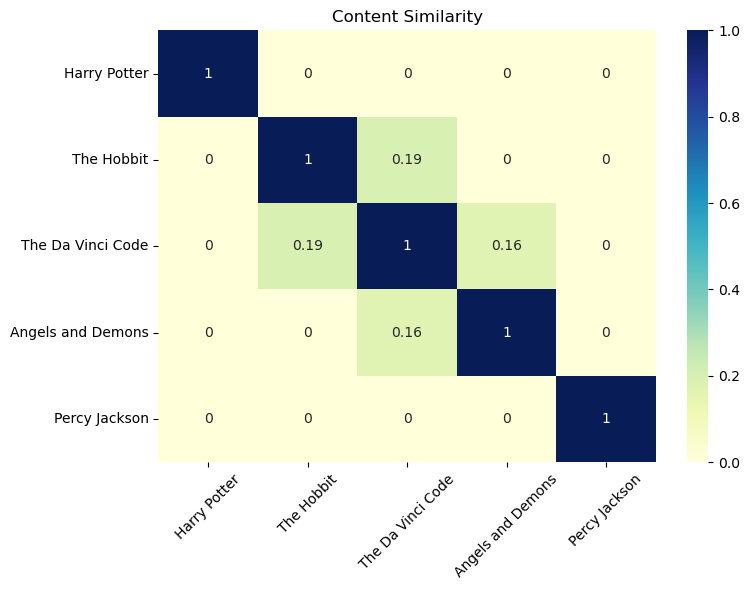

In [8]:
# Visual
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'], yticklabels=books['Title'], annot=True, cmap="YlGnBu")
plt.title("Content Similarity")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# --- Collaborative Filtering ---
user_item_matrix = ratings.pivot_table(index='User_ID', columns='Book_ID', values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

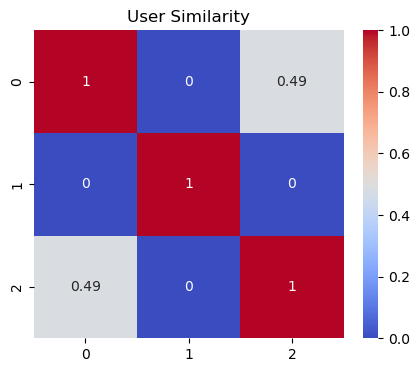

In [10]:
# Visual
plt.figure(figsize=(5,4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [11]:
# User similarity
import numpy as np
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
similar_users = user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [13]:
# --- Hybrid Recommendation ---
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores + 0.4 * aligned_ratings
top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i != book_index][:3]
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybrid Recommendations for User 1:
['Harry Potter', 'The Da Vinci Code', 'Percy Jackson']
